## Trying to impute the values of Tapestry Life Description through Multinomial Regression, Descision Trees, Random Forests and AdaBoost

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Importing the data
train = pd.read_excel("D:/UTD_JSOM/Spring 2018/Practicum/Top Walker/Imputation/Train.xlsx",header=0)
train.columns

Index(['City', 'Company_Goal', 'Company_Name', 'Event_Month', 'Event_Date',
       'Event_Year', 'Event_Year.1', 'Fundraising_Goal', 'Name', 'State1',
       'Participant_Id', 'State', 'Street', 'Team_Average', 'Team_Captain',
       'Team_Count', 'Team_Id', 'Team_Member_Goal', 'Team_Name',
       'Team_Total_Gifts', 'Zip', 'Gifts_Count', 'Registration_Gift',
       'Participant_Gifts', 'Personal_Gift', 'Total_Gifts', 'MATCH_CODE',
       'TAP_LEVEL', 'TAP_DESC', 'TAP_LIFED', 'MEDAGE_CY', 'DIVINDX_CY',
       'MEDHINC_CY', 'MEDDI_CY', 'MEDNW_CY'],
      dtype='object')

In [3]:
# Finding the number of null values
train.isnull().sum()

City                      0
Company_Goal         175729
Company_Name         175729
Event_Month               0
Event_Date                0
Event_Year                0
Event_Year.1              0
Fundraising_Goal          0
Name                      0
State1                32924
Participant_Id            0
State                     0
Street                    0
Team_Average              0
Team_Captain              0
Team_Count                0
Team_Id                   0
Team_Member_Goal       2383
Team_Name              2383
Team_Total_Gifts          0
Zip                       0
Gifts_Count               0
Registration_Gift         0
Participant_Gifts         0
Personal_Gift             0
Total_Gifts               0
MATCH_CODE                0
TAP_LEVEL                 0
TAP_DESC                  0
TAP_LIFED                 0
MEDAGE_CY                 0
DIVINDX_CY                0
MEDHINC_CY                0
MEDDI_CY                  0
MEDNW_CY                  0
dtype: int64

In [67]:
# Extracting the important variable
train_xy = train.iloc[:,[13,15,21,24,29]] 

#train_xy = train_xy[np.isfinite(train_xy['Team_Member_Goal'])]


In [69]:
# Splitting it into x and y 
train_x = train_xy.iloc[:,:4]
train_y = train_xy.iloc[:,4]

In [72]:
train_x.shape

(175878, 4)

In [61]:
train_x.columns

Index(['Team_Average', 'Team_Count', 'Gifts_Count', 'Personal_Gift'], dtype='object')

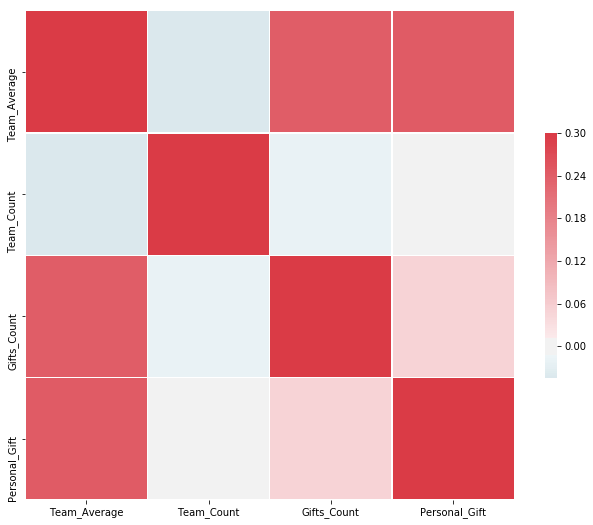

In [62]:
# Finding the correlation between variables
import seaborn as sns
import matplotlib.pyplot as plt


corr = train_x.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [ ]:
# Finding Correlation between variables and target variables
from sklearn.preprocessing import LabelEncoder

le = preprocessing.LabelEncoder()
train_xy["Tapestry"] = le.fit_transform(train_xy.iloc[:,8]) + 1
corr = train_xy.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [17]:
# Loading the test data
test = pd.read_excel("D:/UTD_JSOM/Spring 2018/Practicum/Top Walker/Imputation/Test.xlsx",header=0)
test_x = test.iloc[:,[7,13,15,17,21,24]]
test_x = test_x.dropna(axis=0)

In [77]:
# Splitting into train and validation set 
from sklearn.model_selection import train_test_split
train_x2, val_x2, train_y2, val_y2 = train_test_split(train_x,train_y,test_size=0.30,random_state=100)

In [82]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs",C=10,n_jobs=-1)
softmax_reg.fit(train_x2,train_y2)
pred = softmax_reg.predict(val_x2)
acc = accuracy_score(val_y2,pred)
acc

In [84]:
# Decision Tree Classification
from sklearn.tree import DecisionTreeClassifier

for i in np.arange(2,10,1):
    tree_clf = DecisionTreeClassifier(max_depth=i)
    tree_clf.fit(train_x2,train_y2)
    pred = tree_clf.predict(val_x2)
    acc = accuracy_score(val_y2,pred)
    print("The accuracy at depth ",i,": ",acc)

The accuracy at depth  2 :  0.216264877568
The accuracy at depth  3 :  0.217193541051
The accuracy at depth  4 :  0.218539155485
The accuracy at depth  5 :  0.219088772648
The accuracy at depth  6 :  0.219676294443
The accuracy at depth  7 :  0.220339625502
The accuracy at depth  8 :  0.219373057388
The accuracy at depth  9 :  0.218216966113


In [54]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

for i in np.arange(2,10,1):
    ran_clf = RandomForestClassifier(max_depth=i)
    ran_clf.fit(train_x2,train_y2)
    pred = ran_clf.predict(val_x2)
    acc = accuracy_score(val_y2,pred)
    print("The accuracy at depth ",i,": ",acc)

The accuracy at depth  2 :  0.214144363965
The accuracy at depth  3 :  0.219235720187
The accuracy at depth  4 :  0.219792887471
The accuracy at depth  5 :  0.218851466887
The accuracy at depth  6 :  0.22144517666
The accuracy at depth  7 :  0.221080136026
The accuracy at depth  8 :  0.221618090645
The accuracy at depth  9 :  0.222194470595


In [55]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
            DecisionTreeClassifier(max_depth=2),n_estimators=50,
            algorithm="SAMME.R",learning_rate=0.5)
ada_clf.fit(train_x2,train_y2)
pred = ada_clf.predict(val_x2)

acc = accuracy_score(val_y2,pred)
print("The accuracy at depth : ",acc)

The accuracy at depth :  0.22167572864


### Since the accuracy is very less, we assume that more number of relevant variables are required for imputation and decided to remove the rows with null tapestry value